In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib.colors as colors
from scipy.interpolate import UnivariateSpline
from scipy import interpolate
import scipy.stats
import itertools
#import wquantiles as wq
from sklearn.metrics import confusion_matrix

In [2]:
from matplotlib import ticker
import matplotlib as mpl
label_size = 15
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size

In [5]:
#input_file1 = "/mnt/home/micall12/LowEnergyNeuralNetwork/output_plots/L7_FLERCNN/prediction_values_training_validation_sample.hdf5"
#input_file1 = "/mnt/home/micall12/LowEnergyNeuralNetwork/output_plots/PID_level6_cleanedpulses_IC19_E5to200_60000kmax_variableevtperbin_LRe-3DROPe-.5EPOCHS200/prediction_values_648epochs.hdf5"
#input_file1 = "/mnt/home/micall12/LowEnergyNeuralNetwork/output_plots/MuonClassification_level4_pass2_1793kevents/prediction_values_onL4_108epochs.hdf5"
#input_file1 = "/mnt/home/micall12/LowEnergyNeuralNetwork/output_plots/L7_FLERCNN/prediction_values_1h_2h_140000.hdf5"
input_file1 = "/mnt/scratch/micall12/training_files/test_files/energy_numu_level6_cleanedpulses_IC19_E1to500_20000evtperbin_no8hitcut_LRe-3DROPe-.5EPOCHS200_nDOMcut4/prediction_values_576epochs.hdf5"

f = h5py.File(input_file1, "r")
list(f.keys())
truth1 = f["Y_test_use"][:]
#X_input_DC = f['features_DC'][:]
#X_input_IC = f['features_IC'][:]
X_input_DC = f['X_test_DC'][:]
X_input_IC = f['X_test_IC'][:]
predict1 = f["Y_predicted"][:]
try:
    info1 = f["additional_info"][:]
except:
    info1 = None
try:
    raw_weights1 = f["weights_test"][:]
except:
    raw_weights1 = None
f.close()
del f

In [4]:
path="/mnt/home/micall12/LowEnergyNeuralNetwork/output_plots/L7_FLERCNN/test_DOMcuts"

In [ ]:
run_id1 = np.array(raw_weights1[:,0],dtype=int)
subrun_id1 = np.array(raw_weights1[:,1],dtype=int)
event_id1 = np.array(raw_weights1[:,2],dtype=int)
together1 = [str(i) + str(j) + str(k) for i, j, k in zip(run_id1, subrun_id1, event_id1)]
full_ID1 = np.array(together1,dtype=int )

In [5]:
efactor = 100
#cnn_prob_mu1 = np.array(predict1[:,:,0][-1])
#
#cnn_zenith1 = np.array(predict1[:,:,0][2])
#cnn_prob_track1 = np.array(predict1[:,:,0][1])

cnn_energy1 = np.array(predict1[:,0])
cnn_prob_track1 = np.array(predict1[:,1])
cnn_zenith1 = np.array(predict1[:,2])
cnn_x1 = np.array(predict1[:,3])
cnn_y1 = np.array(predict1[:,4])
cnn_z1 = np.array(predict1[:,5])
cnn_prob_mu1 = np.array(predict1[:,6])
cnn_coszen1 = np.cos(cnn_zenith1)
cnn_prob_nu1 = 1-cnn_prob_mu1


true_energy1 = np.array(truth1[:,0])
true_zenith1 = np.array(truth1[:,1])
true_azimuth1 = np.array(truth1[:,2])
true_coszenith1 = np.cos(true_zenith1)
true_x1 = np.array(truth1[:,4])
true_y1 = np.array(truth1[:,5])
true_z1 = np.array(truth1[:,6])
true_CC1 = np.array(truth1[:,11])
true_isCC1 = true_CC1 == 1
true_track1 = np.array(truth1[:,8])
true_isTrack1 = np.array(true_track1,dtype=bool)
true_PID1 = truth1[:,9]

muon_mask_test1 = (true_PID1) == 13
true_isMuon1 = np.array(muon_mask_test1,dtype=bool)
numu_mask_test1 = (true_PID1) == 14
true_isNuMu1 = np.array(numu_mask_test1,dtype=bool)
nue_mask_test1 = (true_PID1) == 12
true_isNuE1 = np.array(nue_mask_test1,dtype=bool)
nutau_mask_test1 = (true_PID1) == 16
true_isNuTau1 = np.array(nutau_mask_test1,dtype=bool)
nu_mask1 = np.logical_or(np.logical_or(numu_mask_test1, nue_mask_test1), nutau_mask_test1)
true_isNu1 = np.array(nu_mask1,dtype=bool)

weights1 = raw_weights1[:,8]

numu_files1 =97 #50 #99
nue_files1 = 91 #23 #92
muon_files1 = 1999 #17992
nutau_files1 = 1
if weights1 is not None:
    if sum(true_isNuMu1) > 1:
        print("NuMu:",sum(true_isNuMu1),sum(weights1[true_isNuMu1]))
        weights1[true_isNuMu1] = weights1[true_isNuMu1]/numu_files1
        print(sum(weights1[true_isNuMu1]))
    if sum(true_isNuE1) > 1:
        print("NuE:",sum(true_isNuE1),sum(weights1[true_isNuE1]))
        weights1[true_isNuE1] = weights1[true_isNuE1]/nue_files1
        print(sum(weights1[true_isNuE1]))
    if sum(true_isMuon1) > 1:
        print("Muon:",sum(true_isMuon1),sum(weights1[true_isMuon1]))
        weights1[true_isMuon1] = weights1[true_isMuon1]/muon_files1
        print(sum(weights1[true_isMuon1]))
    if sum(nutau_mask_test1) > 1:
        print("NuTau:",sum(true_isNuTau1),sum(weights1[true_isNuTau1]))
        weights1[true_isNuTau1] = weights1[true_isNuTau1]/nutau_files1
        print(sum(weights1[true_isNuTau1]))
        
weights_squared1 = weights1*weights1

NuMu: 558132 0.28652596439028233
0.002953875921549274


In [6]:
noise_class1 = info1[:,4]
nhit_doms1 = info1[:,5]
coin_muon2 = info1[:,0]
ntop1 = info1[:,6]
nouter1 = info1[:,7]

In [7]:
x_origin = np.ones((len(true_x1)))*46.290000915527344
y_origin = np.ones((len(true_y1)))*-34.880001068115234
true_r1 = np.sqrt( (true_x1 - x_origin)**2 + (true_y1 - y_origin)**2 )
cnn_r1 = np.sqrt( (cnn_x1 - x_origin)**2 + (cnn_y1 - y_origin)**2 )

In [8]:
mu_cut = 0.45
cnn_nu1 = cnn_prob_mu1 <= mu_cut
r_cut_value = 165
z_min_value = -495
z_max_value = -225
r_cut1 = cnn_r1 < r_cut_value
z_cut1 = np.logical_and(cnn_z1 > z_min_value, cnn_z1 < z_max_value)
vertex_cut1 = np.logical_and(r_cut1, z_cut1)
coszen_cut = cnn_coszen1 < 0.3
energy_cut = np.logical_and(cnn_energy1 > 5, cnn_energy1 < 100)
#vertex_cut2 = vertex_cut2[not_NuTau2]
cnn_bkgd_cuts1 = np.logical_and(vertex_cut1,cnn_nu1)
cnn_cuts1 = np.logical_and(np.logical_and(cnn_bkgd_cuts1, coszen_cut), energy_cut)
print(sum(true_isNuMu1[cnn_cuts1]))

242313


In [9]:
noise_cut1 = noise_class1 > 0.95
nhits_cut1 = nhit_doms1 >= 3
ntop_cut1 = ntop1 < 3
nouter_cut1 = nouter1 < 8
oscnext_cuts = np.logical_and(noise_cut1, np.logical_and(nhits_cut1, np.logical_and(ntop_cut1, nouter_cut1)))

In [10]:
analysis_cuts = np.logical_and(cnn_cuts1,oscnext_cuts)
print(sum(analysis_cuts)/len(analysis_cuts),sum(analysis_cuts))

0.38361892885553955 214110


In [11]:
charge_DC = X_input_DC[:,:,:,0] > 0
charge_IC = X_input_IC[:,:,:,0] > 0
charge_DC.shape
DC_flat = np.reshape(charge_DC,[X_input_DC.shape[0],480])
IC_flat = np.reshape(charge_IC,[X_input_IC.shape[0],1140])
DOMs_hit_DC = np.sum(DC_flat,axis=-1)
DOMs_hit_IC = np.sum(IC_flat,axis=-1)
DOMs_hit = DOMs_hit_DC + DOMs_hit_IC
DOMs_hit.shape

(558132,)

In [12]:
threshold = 9
check_hit = DOMs_hit > threshold
check_hit_DC = DOMs_hit_DC > threshold
check_hit_IC = DOMs_hit_IC > threshold
below_threshold = check_hit == 0
print(sum(check_hit)/len(check_hit))
print(sum(check_hit_DC)/len(check_hit_DC))
print(sum(check_hit_IC)/len(check_hit_IC))

0.753694466541965
0.6166139909555446
0.044376599084087635


In [13]:
add_cut = analysis_cuts & check_hit
print(sum(add_cut),sum(add_cut)/sum(analysis_cuts))

190065 0.8876979122880763


In [14]:
isCC = np.array(truth1[:,11]) == 1
mask= isCC & analysis_cuts
mask_large = mask & check_hit
mask_small = mask & below_threshold

## Plot 1D Hists

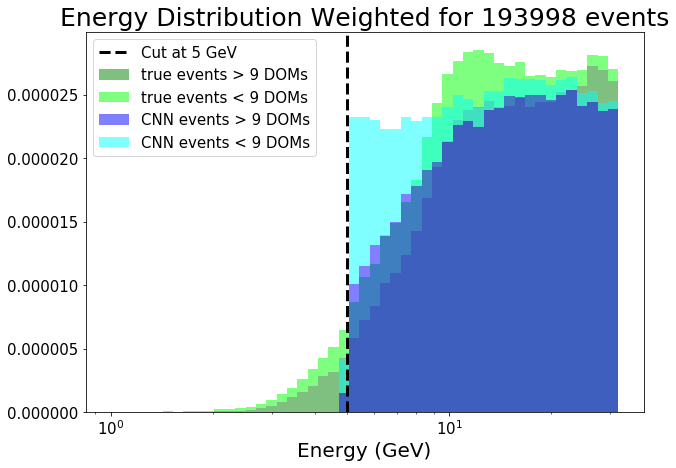

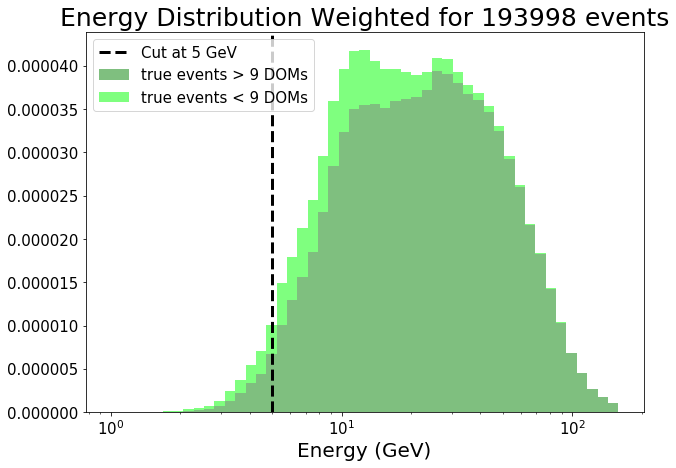

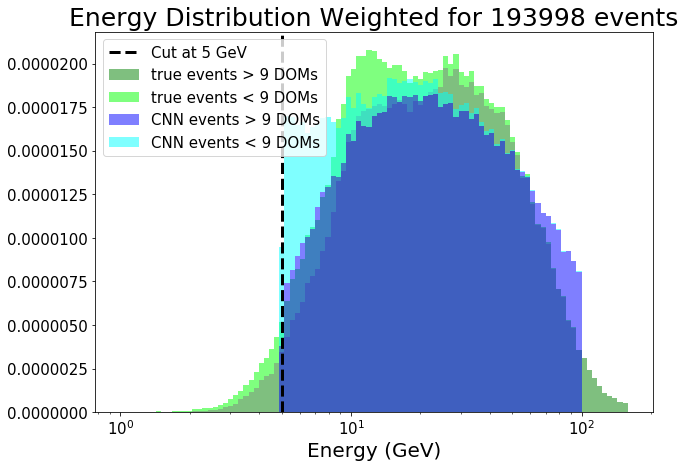

In [15]:
bins = 10**np.linspace(0,1.5,50)
amin=0
amax = 10**1.5
plt.figure(figsize=(10,7))
plt.hist([true_energy1[mask_large], true_energy1[mask_small]], color=["green","lime"],
         label=["true events > %i DOMs"%threshold,"true events < %i DOMs"%threshold],bins=bins,range=[amin,amax],
         weights=[weights1[mask_large],weights1[mask_small]],alpha=0.5,stacked=True)
plt.hist([cnn_energy1[mask_large],cnn_energy1[mask_small]], color=["blue","cyan"],stacked=True,
         label=["CNN events > %i DOMs"%threshold,"CNN events < %i DOMs"%threshold],bins=bins,range=[amin,amax],
         weights=[weights1[mask_large],weights1[mask_small]],alpha=0.5)
#plt.yscale("log")
plt.xscale('log')
plt.title("Energy Distribution Weighted for %s events"%sum(mask),fontsize=25)
plt.xlabel("Energy (GeV)",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(5,linewidth=3,linestyle="--",color='k',label="Cut at 5 GeV")
plt.legend(loc='upper left',fontsize=15)
plt.savefig("%s/LogEnergyDist_ZoomInLE.png"%path)

bins = 10**np.linspace(0,2.2,50)
amin=0
amax = 10**2.2
plt.figure(figsize=(10,7))
plt.hist([true_energy1[mask_large], true_energy1[mask_small]], color=["green","lime"],
         label=["true events > %i DOMs"%threshold,"true events < %i DOMs"%threshold],bins=bins,range=[amin,amax],
         weights=[weights1[mask_large],weights1[mask_small]],alpha=0.5,stacked=True)
#plt.hist([cnn_energy1[mask_large],cnn_energy1[mask_small]], color=["blue","cyan"],stacked=True,
#         label=["CNN events > %i DOMs"%threshold,"CNN events < %i DOMs"%threshold],bins=bins,range=[amin,amax],
#         weights=[weights1[mask_large],weights1[mask_small]],alpha=0.5)
#plt.yscale("log")
plt.xscale('log')
plt.title("Energy Distribution Weighted for %s events"%sum(mask),fontsize=25)
plt.xlabel("Energy (GeV)",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(5,linewidth=3,linestyle="--",color='k',label="Cut at 5 GeV")
plt.legend(loc='upper left',fontsize=15)
plt.savefig("%s/LogEnergyDist_TrueOnly_ZoomInLE.png"%path)

bins = 10**np.linspace(0,2.2,100)
amin=0
amax = 10**2.2
plt.figure(figsize=(10,7))
plt.hist([true_energy1[mask_large], true_energy1[mask_small]], color=["green","lime"],
         label=["true events > %i DOMs"%threshold,"true events < %i DOMs"%threshold],bins=bins,range=[amin,amax],
         weights=[weights1[mask_large],weights1[mask_small]],alpha=0.5,stacked=True)
plt.hist([cnn_energy1[mask_large],cnn_energy1[mask_small]], color=["blue","cyan"],stacked=True,
         label=["CNN events > %i DOMs"%threshold,"CNN events < %i DOMs"%threshold],bins=bins,range=[amin,amax],
         weights=[weights1[mask_large],weights1[mask_small]],alpha=0.5)
#plt.yscale("log")
plt.xscale('log')
plt.title("Energy Distribution Weighted for %s events"%sum(mask),fontsize=25)
plt.xlabel("Energy (GeV)",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(5,linewidth=3,linestyle="--",color='k',label="Cut at 5 GeV")
plt.legend(loc='upper left',fontsize=15)
plt.savefig("%s/LogEnergyDist.png"%path)

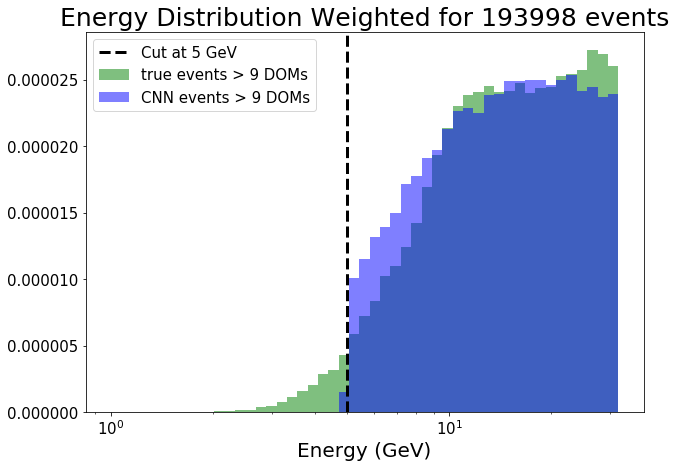

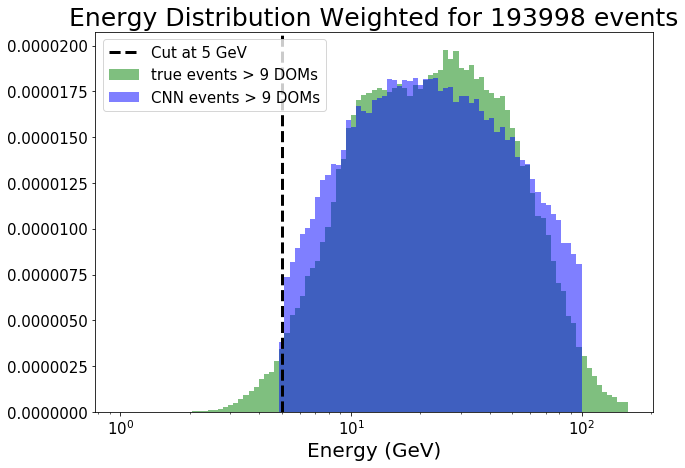

In [16]:
bins = 10**np.linspace(0,1.5,50)
amin=0
amax = 10**1.2
plt.figure(figsize=(10,7))
plt.hist(true_energy1[mask_large], color="green",
         label="true events > %i DOMs"%threshold,bins=bins,range=[amin,amax],
         weights=weights1[mask_large],alpha=0.5)
plt.hist(cnn_energy1[mask_large], color="blue",
         label="CNN events > %i DOMs"%threshold,bins=bins,range=[amin,amax],
         weights=weights1[mask_large],alpha=0.5)
#plt.yscale("log")
plt.xscale('log')
plt.title("Energy Distribution Weighted for %s events"%sum(mask),fontsize=25)
plt.xlabel("Energy (GeV)",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(5,linewidth=3,linestyle="--",color='k',label="Cut at 5 GeV")
plt.legend(loc='upper left',fontsize=15)
plt.savefig("%s/LogEnergyDist_cut%iDOMs_ZoomInLE.png"%(path,threshold))

bins = 10**np.linspace(0,2.2,100)
amin=0
amax = 10**2.2
plt.figure(figsize=(10,7))
plt.hist(true_energy1[mask_large], color="green",
         label="true events > %i DOMs"%threshold,bins=bins,range=[amin,amax],
         weights=weights1[mask_large],alpha=0.5)
plt.hist(cnn_energy1[mask_large], color="blue",
         label="CNN events > %i DOMs"%threshold,bins=bins,range=[amin,amax],
         weights=weights1[mask_large],alpha=0.5)
#plt.yscale("log")
plt.xscale('log')
plt.title("Energy Distribution Weighted for %s events"%sum(mask),fontsize=25)
plt.xlabel("Energy (GeV)",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(5,linewidth=3,linestyle="--",color='k',label="Cut at 5 GeV")
plt.legend(loc='upper left',fontsize=15)
plt.savefig("%s/LogEnergyDist_cut%iDOMs"%(path,threshold))

In [17]:
print(sum(mask_small),sum(mask_large),sum(mask_small)/(sum(mask_small)+sum(mask_large)))

21919 172079 0.11298570088351426


## Resolution Plots

In [18]:
from PlottingFunctions import plot_bin_slices
from PlottingFunctions import plot_2D_prediction

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


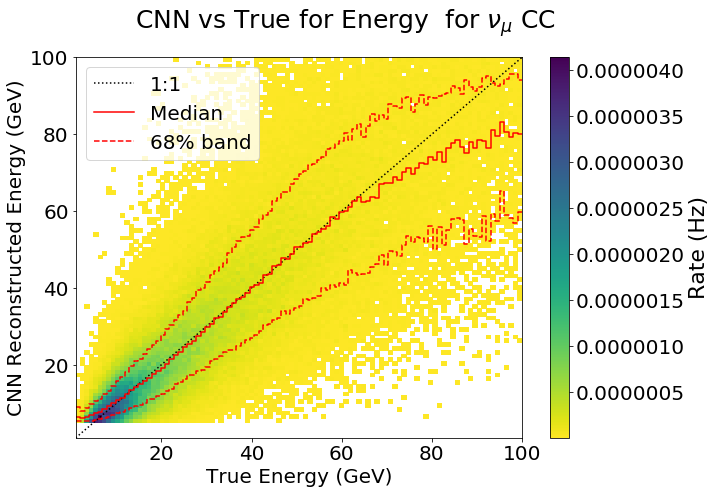

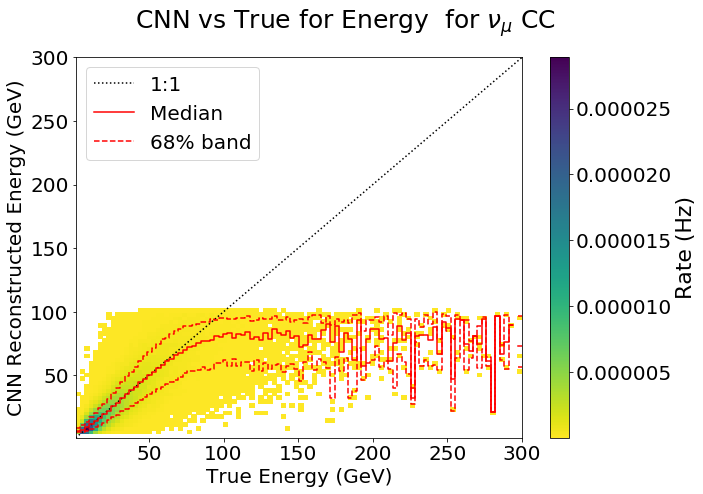

In [19]:
allevents = np.ones(len(true_energy1),dtype=bool)
a_mask = mask_large
variable="Energy"
units="(GeV)"
bins = 100

plot_2D_prediction(true_energy1[a_mask], cnn_energy1[a_mask], weights=weights1[a_mask], \
                        save=True,savefolder=path,syst_set="",\
                        bins=bins,minval=1,maxval=100,sample="CC",\
                        cut_truth = False, axis_square = True, log=False,
                        variable=variable, units = units, epochs=None,reco_name="CNN",
                        save_name="gt%iDOMs_max200"%threshold,notebook=True)

plot_2D_prediction(true_energy1[a_mask], cnn_energy1[a_mask], weights=weights1[a_mask], \
                        save=True,savefolder=path,syst_set="",\
                        bins=bins,minval=1,maxval=300,sample="CC",\
                        cut_truth = False, axis_square = True,log=False,
                        variable=variable, units = units, epochs=None,reco_name="CNN",
                        save_name="gt%iDOMs_max200"%threshold,notebook=True)

In [30]:
10**0.2

1.5848931924611136

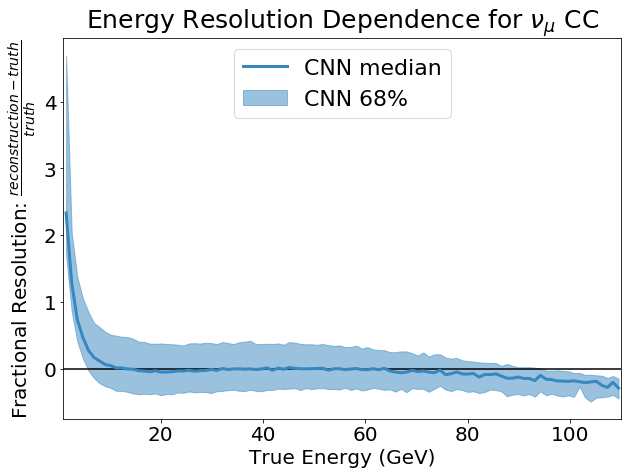

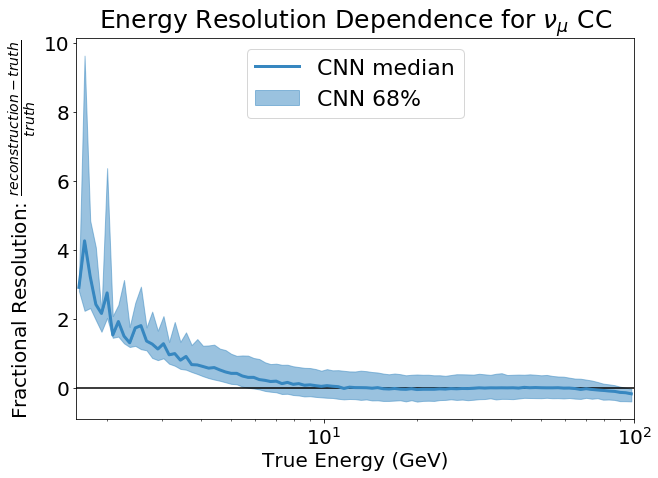

In [31]:
bins = 10**np.linspace(0.2,2,100)

plot_bin_slices(true_energy1[a_mask], cnn_energy1[a_mask],
                        weights=weights1[a_mask],
                        vs_predict = False,use_fraction = True,
                        bins=100,save_name="gt%iDOMs_max200"%threshold,
                        min_val=1, max_val=110,
                        save=True,savefolder=path,
                        variable="Energy", units="(GeV)",
                        flavor="NuMu",sample="CC",notebook=True)

plot_bin_slices(true_energy1[a_mask], cnn_energy1[a_mask],
                        weights=weights1[a_mask],
                        vs_predict = False,use_fraction = True,
                        specific_bins=bins,savefolder=path,
                        min_val=1, max_val=10**2,
                        save=True,xlog = True,save_name="gt%iDOMs_max200"%threshold,
                        variable="Energy", units="(GeV)",
                        flavor="NuMu",sample="CC",notebook=True)

In [41]:
10**1.7

50.11872336272722

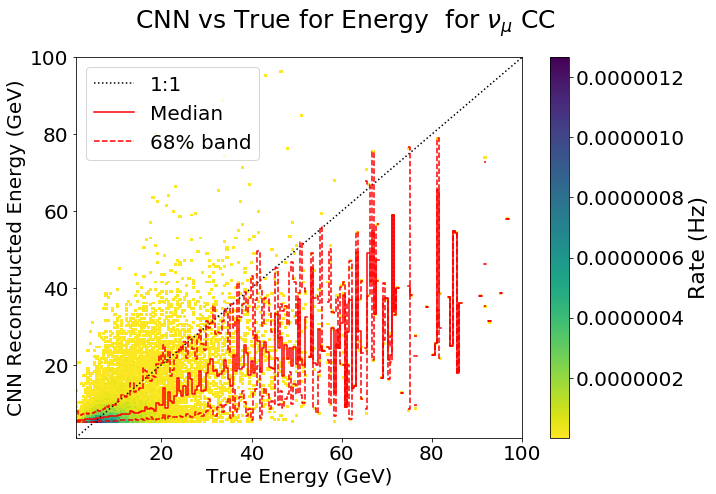

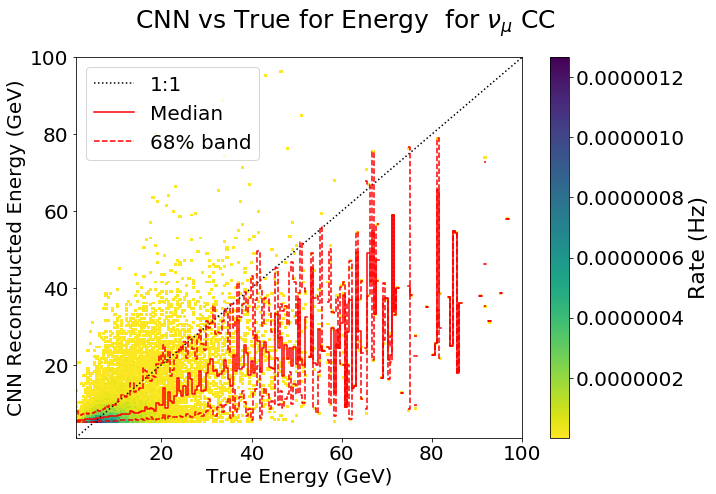

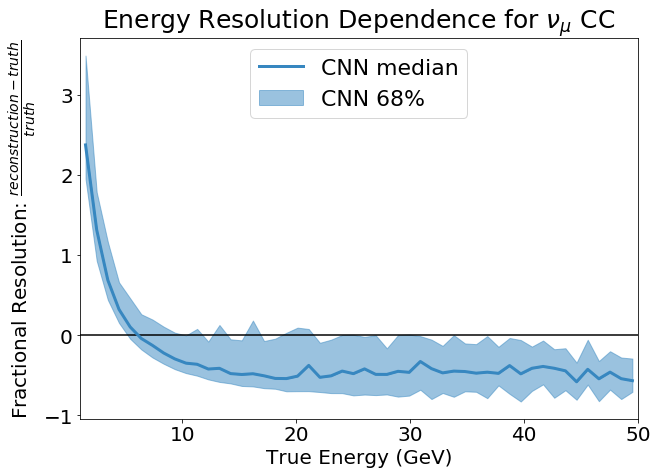

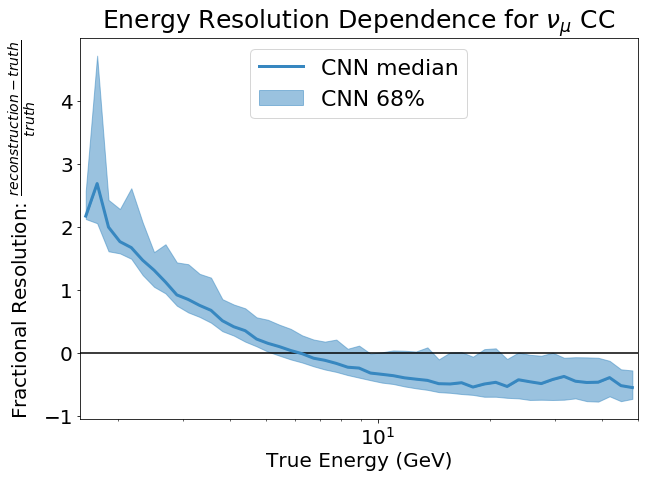

In [42]:
a_mask = mask_small
plot_2D_prediction(true_energy1[a_mask], cnn_energy1[a_mask], weights=weights1[a_mask], \
                        save=True,savefolder=path,syst_set="",\
                        bins=199,minval=1,maxval=100,sample="CC",\
                        cut_truth = False, axis_square = True, log=False,
                        variable=variable, units = units, epochs=None,reco_name="CNN",
                        save_name="lt%iDOMs_max200"%threshold,notebook=True)

plot_2D_prediction(true_energy1[a_mask], cnn_energy1[a_mask], weights=weights1[a_mask], \
                        save=True,savefolder=path,syst_set="",\
                        bins=199,minval=1,maxval=100,sample="CC",\
                        cut_truth = False, axis_square = True,log=False,
                        variable=variable, units = units, epochs=None,reco_name="CNN",
                        save_name="lt%iDOMs_max500"%threshold,notebook=True)

plot_bin_slices(true_energy1[a_mask], cnn_energy1[a_mask],
                        weights=weights1[a_mask],
                        vs_predict = False,use_fraction = True,
                        bins=50,save_name="lt%iDOMs_max200"%threshold,
                        min_val=1, max_val=50,
                        save=True,savefolder=path,
                        variable="Energy", units="(GeV)",
                        flavor="NuMu",sample="CC",notebook=True)

bins = 10**np.linspace(0.2,1.7,50)

plot_bin_slices(true_energy1[a_mask], cnn_energy1[a_mask],
                        weights=weights1[a_mask],
                        vs_predict = False,use_fraction = True,
                        specific_bins=bins,savefolder=path,
                        min_val=1, max_val=10**1.7,
                        save=True,xlog = True,save_name="lt%iDOMs_max200"%threshold,
                        variable="Energy", units="(GeV)",
                        flavor="NuMu",sample="CC",notebook=True)

In [ ]:
a_mask=mask_large
bins = 10**np.linspace(0,1.5,50)
amin = 1
amax = 10**1.5
print(sum(weights<0))
plt.figure(figsize=(10,10))
plt.title("True vs CNN Energy, > %i DOMs"%threshold",fontsize=25)
log_true_energy = np.log10(true_energy)
log_cnn_energy = np.log10(cnn_energy)
plt.hist2d(true_energy[a_mask],cnn_energy[mask],weights=final_weights[mask],
           bins=bins,cmap='viridis_r',range=[[amin,amax],[amin,amax]],cmin=1e-12) #,norm=colors.LogNorm())
cbat = plt.colorbar()
plt.yscale('log')
plt.xscale('log')
plt.ylabel("CNN Energy (GeV)",fontsize=20)
plt.xlabel("True Energy (GeV)",fontsize=20)
plt.plot([amin,amax],[amin,amax],'k:',label="1:1")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axhline(5,linewidth=3,linestyle="--",color='k',label="Cut at 5 GeV")
plt.savefig("%s/Log2DEnergy_ZoomInLE_gt%iDOMs.png"%(path,threshold))

a_mask=mask_small
print(sum(weights<0))
plt.figure(figsize=(10,10))
plt.title("True vs CNN Energy, < %i DOMs"%threshold,fontsize=25)
log_true_energy = np.log10(true_energy)
log_cnn_energy = np.log10(cnn_energy)
plt.hist2d(true_energy[mask],cnn_energy[mask],weights=final_weights[mask],
           bins=bins,cmap='viridis_r',range=[[amin,amax],[amin,amax]],cmin=1e-12) #,norm=colors.LogNorm())
cbat = plt.colorbar()
plt.yscale('log')
plt.xscale('log')
plt.ylabel("CNN Energy (GeV)",fontsize=20)
plt.xlabel("True Energy (GeV)",fontsize=20)
plt.plot([amin,amax],[amin,amax],'k:',label="1:1")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axhline(5,linewidth=3,linestyle="--",color='k',label="Cut at 5 GeV")
plt.savefig("%s/Log2DEnergy_ZoomInLE_ltiDOMs.png"%(path,threshold))

In [ ]:
bins = 10**numpy.linspace(0,2.3,100)
a_mask = isCC

plot_bin_slices(true_energy[a_mask], cnn_energy[a_mask],
                        weights=final_weights[a_mask],
                        vs_predict = False,use_fraction = True,
                        bins=100,
                        min_val=1, max_val=200,
                        save=True,savefolder=path,
                        variable="Energy", units="(GeV)",
                        flavor="NuMu",sample="CC",notebook=True)

plot_bin_slices(true_energy[a_mask], cnn_energy[a_mask],
                        weights=final_weights[a_mask],
                        vs_predict = False,use_fraction = True,
                        specific_bins=bins,savefolder=path,
                        min_val=1, max_val=10**2.3,
                        save=True,xlog = True,
                        variable="Energy", units="(GeV)",
                        flavor="NuMu",sample="CC",notebook=True)

plot_bin_slices(true_energy[a_mask], cnn_energy[a_mask],
                        weights=final_weights[a_mask],
                        vs_predict = True,use_fraction = True,
                        bins=100, xline=[5,100], xline_name="Analysis Cut",
                        min_val=3, max_val=200,
                        save=True,savefolder=path,
                        variable="Energy", units="(GeV)",
                        flavor="NuMu",sample="CC",notebook=True)

In [ ]:
#input_file1 = "/mnt/home/micall12/LowEnergyNeuralNetwork/output_plots/L7_FLERCNN/prediction_values_training_validation_sample.hdf5"
#input_file1 = "/mnt/home/micall12/LowEnergyNeuralNetwork/output_plots/PID_level6_cleanedpulses_IC19_E5to200_60000kmax_variableevtperbin_LRe-3DROPe-.5EPOCHS200/prediction_values_648epochs.hdf5"
input_file2 = "/mnt/home/micall12/LowEnergyNeuralNetwork/output_plots/MuonClassification_level4_pass2_1793kevents/prediction_values_108epochs.hdf5"

f = h5py.File(input_file2, "r")
list(f.keys())
truth2 = f["Y_test_use"][:]
predict2 = f["Y_predicted"][:]
try:
    info2 = f["additional_info"][:]
except:
    info2 = None
try:
    raw_weights2 = f["weights_test"][:]
except:
    raw_weights2 = None
f.close()
del f

In [ ]:
run_id2 = np.array(raw_weights2[:,0],dtype=int)
subrun_id2 = np.array(raw_weights2[:,1],dtype=int)
event_id2 = np.array(raw_weights2[:,2],dtype=int)
together2 = [str(i) + str(j) + str(k) for i, j, k in zip(run_id2, subrun_id2, event_id2)]
full_ID2 = np.array(together2,dtype=int )

In [ ]:
true_PID2 = truth2[:,9]
muon_mask_test2 = (true_PID2) == 13
true_isMuon2 = np.array(muon_mask_test2,dtype=bool)

In [ ]:
input_file2 = "/mnt/home/micall12/LowEnergyNeuralNetwork/output_plots/L7_FLERCNN/prediction_values_1201h_1401h_16.5h_1318k19k.hdf5"

f = h5py.File(input_file2, "r")
truth2 = f["Y_test_use"][:]
predict2 = f["Y_predicted"][:]
try:
    info2 = f["additional_info"][:]
except:
    info2 = None
try:
    raw_weights2 = f["weights_test"][:]
except:
    raw_weights2 = None
f.close()
del f

In [ ]:
cnn_prob_mu2 = np.array(predict2[:,:,0][-1])
#cnn_prob_mu2 = np.array(predict2[:,-1])
cnn_prob_nu2 = 1-cnn_prob_mu2
#cnn_zenith2 = np.array(predict2[:,1])
#cnn_prob_track2 = np.array(predict2[:,2])
#cnn_x2 = np.array(predict2[:,3])
#cnn_y2 = np.array(predict2[:,4])
#cnn_z2 = np.array(predict2[:,5])
#cnn_coszen2 = np.cos(cnn_zenith2)
#cnn_energy2 = np.array(predict2[:,0])

true_energy2 = np.array(truth2[:,0])
true_zenith2 = np.array(truth2[:,1])
true_azimuth2 = np.array(truth2[:,2])
true_coszenith2 = np.cos(true_zenith2)
true_x2 = np.array(truth2[:,4])
true_y2 = np.array(truth2[:,5])
true_z2 = np.array(truth2[:,6])
true_CC2 = np.array(truth2[:,11])
true_isCC2 = true_CC2 == 1
true_track2 = np.array(truth2[:,8])
true_isTrack2 = np.array(true_track2,dtype=bool)
true_PID2 = truth2[:,9]

muon_mask_test2 = (true_PID2) == 13
true_isMuon2 = np.array(muon_mask_test2,dtype=bool)
numu_mask_test2 = (true_PID2) == 14
true_isNuMu2 = np.array(numu_mask_test2,dtype=bool)
nue_mask_test2 = (true_PID2) == 12
true_isNuE2 = np.array(nue_mask_test2,dtype=bool)
nutau_mask_test2 = (true_PID2) == 16
true_isNuTau2 = np.array(nutau_mask_test2,dtype=bool)
nu_mask2 = np.logical_or(np.logical_or(numu_mask_test2, nue_mask_test2), nutau_mask_test2)
true_isNu2 = np.array(nu_mask2,dtype=bool)

weights2 = raw_weights2[:,8]

#remove NuTau!
not_NuTau2 = np.invert(true_isNuTau2)
weights2 = weights2[not_NuTau2]
cnn_prob_mu2 = cnn_prob_mu2[not_NuTau2]
cnn_prob_nu2 = cnn_prob_nu2[not_NuTau2]
true_isMuon2 = true_isMuon2[not_NuTau2]
true_isNu2 = true_isNu2[not_NuTau2]
true_isNuMu2 = true_isNuMu2[not_NuTau2]
true_isNuE2 = true_isNuE2[not_NuTau2]

numu_files2 = 97
nue_files2 = 91
muon_files2 = 1999
nutau_files2 = 45
if weights2 is not None:
    if sum(true_isNuMu2) > 1:
        print("NuMu:",sum(true_isNuMu2),sum(weights2[true_isNuMu2]))
        weights2[true_isNuMu2] = weights2[true_isNuMu2]/numu_files2
        print(sum(weights2[true_isNuMu2]))
    if sum(true_isNuE2) > 1:
        print("NuE:",sum(true_isNuE2),sum(weights2[true_isNuE2]))
        weights2[true_isNuE2] = weights2[true_isNuE2]/nue_files2
        print(sum(weights2[true_isNuE2]))
    if sum(true_isMuon2) > 1:
        print("Muon:",sum(true_isMuon2),sum(weights2[true_isMuon2]))
        weights2[true_isMuon2] = weights2[true_isMuon2]/muon_files2
        print(sum(weights2[true_isMuon2]))
    #if sum(nutau_mask_test2) > 1:
    #    print("NuTau:",sum(true_isNuTau2),sum(weights2[true_isNuTau2]))
    #    weights2[true_isNuTau2] = weights2[true_isNuTau2]/nutau_files2
    #    print(sum(weights2[true_isNuTau2]))
    
weights_squared2 = weights2*weights2

In [ ]:
L6_muon = full_ID2[true_isMuon2] #[1300001800099782, 13000018000130004]
L6_events = []
L4_events = []
print(len(L6_muon))
mask_isL6 = np.zeros(len(full_ID1),dtype=bool)

for index, evt in enumerate(full_ID1):
    if evt in L6_muon: #full_ID2:
        mask_isL6[index] = True
        L6_events.append(index)
    else:
        L4_events.append(index)
print(sum(mask_isL6))

In [ ]:
nu1 = true_isNu1 == 1
mu1 = true_isNu1 == 0

In [ ]:
mask_isL4 = mask_isL6 == 0

In [ ]:
plt.figure(figsize=(10,7))
width=3

#h, b, c = plt.hist(cnn_prob_nu1,range=[0.,1.],bins=50,color='k',histtype='step',linestyle="-",linewidth=width,
#         alpha=0.5,weights=weights1,label="Total Muon")
h2, b2, c2 = plt.hist(cnn_prob_nu1[mask_isL4],range=[0.,1.],bins=50,color='b',histtype='step',linestyle="-",linewidth=width,
         alpha=0.5,weights=weights1[mask_isL4],label="L4 Only Muon")
h3, b3, c3 = plt.hist(cnn_prob_nu1[mask_isL6],range=[0.,1.],bins=50,color='r',histtype='step',linestyle="-",linewidth=width,
         alpha=0.5,weights=weights1[mask_isL6],label="L6 Muons")
plt.hist(cnn_prob_nu2[true_isNu2],range=[0.,1.],bins=50,color='g',histtype='step',linestyle="-",linewidth=width,
         alpha=0.8,weights=weights2[true_isNu2],label="True Neutrino")
plt.xlabel("Probability Neutrino",fontsize=20)
plt.title("Muon Classifier",fontsize=25)
plt.ylabel("Normalized Rate",fontsize=20)
plt.legend(loc="upper center",fontsize=20)
plt.yscale('log')

In [ ]:
print(sum(true_isNu2))

In [ ]:
mu_cut = 0.99
postcut1 = cnn_prob_mu1 <= mu_cut

In [ ]:
my_confusion_matrix(true_isNu1, postcut1, weights1, mask=None, title="CNN Muon Cut Trained at L4")

In [ ]:
numu_sum = 0
for i in range(len(true_isNuMu2)):
    if true_isNuMu2[i] == 1:
        numu_sum += 1
    if numu_sum > 7500:
        print("hit it at %s"%i)
        numu_index = i
        break
true_isNuMu_short2 = np.copy(true_isNuMu2)
true_isNuMu_short2[numu_index:] = 0
print(sum(true_isNuMu_short2))

In [ ]:
nue_sum = 0
for i in range(len(true_isNuE2)):
    if true_isNuE2[i] == 1:
        nue_sum += 1
    if nue_sum > 7500:
        print("hit it at %s"%i)
        nue_index = i
        break
true_isNuE_short2 = np.copy(true_isNuE2)
true_isNuE_short2[nue_index:] = 0
print(sum(true_isNuE_short2))

In [ ]:
muon_sum = 0
for i in range(len(true_isMuon2)):
    if true_isMuon2[i] == 1:
        muon_sum += 1
    if muon_sum > 15000:
        print("hit it at %s"%i)
        mu_index = i
        break
true_isMu_short2 = np.copy(true_isMuon2)
true_isMu_short2[mu_index:] = 0
print(sum(true_isMu_short2))

In [ ]:
true_isNu_short2 = np.logical_or(true_isNuMu_short2, true_isNuE_short2)
print(sum(true_isNu_short2))

In [ ]:
mask_short2 = np.logical_or(true_isNu_short2,true_isMu_short2)
print(sum(mask_short2))

In [ ]:
numu_sum = 0
for i in range(len(true_isNuMu1)):
    if true_isNuMu1[i] == 1:
        numu_sum += 1
    if numu_sum > 7500:
        print("hit it at %s"%i)
        numu_index = i
        break
true_isNuMu_short1 = np.copy(true_isNuMu1)
true_isNuMu_short1[numu_index:] = 0
print(sum(true_isNuMu_short1))

In [ ]:
nue_sum = 0
for i in range(len(true_isNuE1)):
    if true_isNuE1[i] == 1:
        nue_sum += 1
    if nue_sum > 7500:
        print("hit it at %s"%i)
        nue_index = i
        break
true_isNuE_short1 = np.copy(true_isNuE1)
true_isNuE_short1[nue_index:] = 0
print(sum(true_isNuE_short1))

In [ ]:
muon_sum = 0
for i in range(len(true_isMuon1)):
    if true_isMuon1[i] == 1:
        muon_sum += 1
    if muon_sum > 15000:
        print("hit it at %s"%i)
        mu_index = i
        break
true_isMu_short1 = np.copy(true_isMuon1)
true_isMu_short1[mu_index:] = 0
print(sum(true_isMu_short1))

In [ ]:
true_isNu_short1 = np.logical_or(true_isNuMu_short1, true_isNuE_short1)
print(sum(true_isNu_short1))

In [ ]:
mask_short1 = np.logical_or(true_isNu_short1,true_isMu_short1)
print(sum(mask_short1))

In [ ]:
def my_confusion_matrix(binary_truth, binary_class, weights, mask=None, color="Blues",
                     label0="Muon",label1="Neutrino",ylabel="CNN Prediction",xlabel="Truth",
                     title="CNN Muon Cut"):

    if mask is None:
        mask = np.ones(len(binary_truth),dtype=bool)

    cm = confusion_matrix(binary_truth[mask], binary_class[mask], sample_weight=weights[mask])
    invert_binary_truth = np.invert(binary_truth[mask])
    
    weights_squared = weights*weights
    hist_squared, xbins_notused, ybins_notused = np.histogram2d(invert_binary_truth, binary_class[mask],bins=2,weights=weights_squared[mask]);
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_aspect("equal")
    blues=plt.get_cmap("%s"%color)
    minval = np.min(cm)
    maxval = np.max(cm)

    
    hist, xbins, ybins, im = ax.hist2d(invert_binary_truth, binary_class[mask], bins=2,
                                       cmap=blues,weights=weights[mask],
                                       norm=colors.LogNorm(vmin=minval, vmax=maxval));
    fig.colorbar(im, orientation='vertical')
    plt.yticks(ticks=[0.25,0.75],labels=["%s"%label0, "%s"%label1],fontsize=20)
    plt.xticks(ticks=[0.25,0.75],labels=["%s"%label1, "%s"%label0],fontsize=20)
    ax.set_ylabel("%s"%ylabel,fontsize=25)
    ax.set_xlabel("%s"%xlabel,fontsize=25)
    ax.set_title("%s"%title,fontsize=30)
     
    
    true_one = binary_truth == 1
    true_zero = binary_truth == 0
    mask_true_one = np.logical_and(true_one,mask)
    mask_true_zero = np.logical_and(true_zero,mask)
 
    transposed_hist_squared = np.transpose(hist_squared)
    
    save_percent = []
    for i in range(len(ybins)-1):
        for j in range(len(xbins)-1):
            c="k"
            if j == 0:
                total = sum(weights[mask_true_one])
            if j == 1:
                total = sum(weights[mask_true_zero])
            events = hist.T[i,j]
            error = np.sqrt(transposed_hist_squared[i,j])
            percent = (float(events)/float(total))*100
            save_percent.append(percent)
            s = "%.2e"%(events) + r'$\pm$' + "%.2e\n %.2f"%(error,percent) + '% of truth'
            if events > maxval/2.:
                c="w"
            ax.text(xbins[j]+0.25,ybins[i]+0.25,"%s"%s, 
                    color=c, ha="center", va="center", fontweight="bold",fontsize=18)
    print(save_percent)

In [ ]:
def plot_hist_given_hist(hist_here,label_factor=1,title="Counts",label_factor_title=None,pid="CNN Track"):
    
    if label_factor_title is None:
        label_factor_title = str(label_factor)
    
    fig, ax = plt.subplots(figsize=(15,13))
    ax.set_title("%s: True Muon, %s (label x %s)"%(title,pid,label_factor_title),fontsize=25)
    im = ax.imshow(hist_here,origin='lower', cmap='viridis_r')
    fig.colorbar(im, orientation='vertical')
    ax.set_xlabel("CNN Energy (GeV)",fontsize=20)
    ax.set_ylabel("CNN Cos Zenith",fontsize=20)

    xlabels=[]
    for i in range(0,len(energy_bins)):
        if i%2==0:
            xlabels.append("%.2f"%energy_bins[i])
    ylabels=[]
    for i in range(0,len(coszen_bins)):
        if i%2==0:
            ylabels.append("%.2f"%coszen_bins[i])
    ax.set_xticks([-0.5,1.5,3.5,5.5,7.5,9.5,11.5])
    ax.set_yticks([-0.5,1.5,3.5,5.5,7.5,9.5])
    ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
    ax.set_xticklabels(xlabels)
    ax.set_yticklabels(ylabels)
    
    maxhist = np.nanmax(hist_here)
    for i in range(len(ybins)-1):
        for j in range(len(xbins)-1):
            c="k"
            #total = sum(weights1[mask])
            events = hist_here[i,j]
            if events > maxhist/2.:
                c="w"
            s = "%.2f"%(events*label_factor)
            ax.text(j, i,"%s"%s, 
                    color=c, ha="center", va="center",fontsize=15)

In [ ]:
mu_cut = 0.45
postcut1 = cnn_prob_mu1 <= mu_cut
postcut2 = cnn_prob_mu2 <= mu_cut

In [ ]:
postcut1 = cnn_prob_mu1 <= 0.03
my_confusion_matrix(true_isNu1, postcut1, weights1, mask=None, title="CNN Muon Cut Trained at L4")

In [ ]:
my_confusion_matrix(true_isNu2, postcut2, weights2, mask=None, title="CNN Muon Cut Trained at L6")

In [ ]:
noise_class2 = info2[:,4]
nhit_doms2 = info2[:,5]
coin_muon2 = info2[:,0]
ntop2 = info2[:,6]
nouter2 = info2[:,7]

In [ ]:
x_origin = np.ones((len(true_x2)))*46.290000915527344
y_origin = np.ones((len(true_y2)))*-34.880001068115234
true_r2 = np.sqrt( (true_x2 - x_origin)**2 + (true_y2 - y_origin)**2 )
cnn_r2 = np.sqrt( (cnn_x2 - x_origin)**2 + (cnn_y2 - y_origin)**2 )

In [ ]:
true_all1 = true_energy1 > 0
true_all2 = true_energy2 > 0
true_all2 = true_all2[not_NuTau2]
#print(len(true_energy1),len(cnn_prob_track1),sum(true_all))

In [ ]:
print(len(true_isNu2),len(cnn_prob_nu2),len(true_all2),len(weights2))
print(len(true_isNu1),len(cnn_prob_nu1),len(true_all1),len(weights1))

In [ ]:
print(sum(weights_squared1)/sum(weights1))
print(sum(weights_squared2)/sum(weights2))

In [ ]:
from PlottingFunctionsClassification import plot_classification_hist
from PlottingFunctionsClassification import ROC
save=False
save_folder=None

plot_classification_hist(true_isNu2,cnn_prob_nu2,mask=true_all2, mask_name="No Cuts", 
                         units="",bins=50,weights=weights2, log=False,save=save,
                         save_folder_name=save_folder,name_prob1 = "Neutrino", name_prob0 = "Muon",
                         notebook=True)

plot_classification_hist(true_isNu1,cnn_prob_nu1,mask=true_all1, mask_name="No Cuts", 
                         units="",bins=50,weights=weights1, log=False,save=save,
                         save_folder_name=save_folder,name_prob1 = "Neutrino", name_prob0 = "Muon",
                         notebook=True)

#ROC(true_isNu_short2,cnn_prob_nu2,mask=mask_short2,mask_name="Balanced Nu and Mu",save=save,
#    reco=cnn_prob_nu1, reco_truth=true_isNu_short1, reco_mask=mask_short1, reco_name = "L4 Class",
#        save_folder_name=save_folder,variable="Probability Neutrino",notebook=True)

In [ ]:
cnn_prob_track2 = cnn_prob_track2[not_NuTau2]
true_isTrack2 = true_isTrack2[not_NuTau2]
ROC(true_isTrack2,cnn_prob_track2,mask=true_all2,mask_name="No Cuts",save=save,
        save_folder_name=save_folder,variable="Probability Track",notebook=True)

In [ ]:
nu1 = true_isNu1 == 1
mu1 = true_isNu1 == 0
nu2 = true_isNu2 == 1
mu2 = true_isNu2 == 0


In [ ]:
reco_energy = {'num_bins':12, 'is_log':True, 'domain':[5., 100.]*units.GeV, 'tex': r'E_{\rm reco}'}
reco_coszen = {'num_bins':10, 'is_lin':True, 'domain':[-1, 0.3], 'tex':r'\cos\,\theta_{z,{\rm reco}}'}
pid = {'bin_edges': [0., 0.5, 0.85, 1.], 'tex':r'{\rm PID}', 'bin_names':['cascades', 'mixed', 'tracks'] }

In [ ]:
coszen_bins = np.linspace(-1,0.3,11)
energy_bins = np.logspace(0.699,2,13)
cnn_track1 = cnn_prob_track1 >= 0.85
cnn_mixed1 = np.logical_and(cnn_prob_track1 >= 0.5, cnn_prob_track1 < 0.85)
cnn_cascade1 = cnn_prob_track1 < 0.5

In [ ]:
mask = np.logical_and(cnn_track1, true_isMuon1) 

fig, ax = plt.subplots(figsize=(15,13))
ax.set_title("Count: True Muon, CNN Track",fontsize=25)
hist, xbins, ybins, im = plt.hist2d(cnn_energy1[mask],cnn_coszen1[mask],
                                    weights=weights1[mask],bins=[energy_bins,coszen_bins],
                                    cmap='viridis_r',cmin=0) #,norm=colors.LogNorm())
fig.colorbar(im, orientation='vertical')
ax.set_xlabel("CNN Energy (GeV)",fontsize=20)
ax.set_ylabel("CNN Cos Zenith",fontsize=20)
ax.set_xscale('log')
ax.set_xticks([5,8,10,30,50,100])
ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
maxhist = np.max(hist)

for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        c="k"
        #total = sum(weights1[mask])
        events = hist.T[i,j]
        if events > maxhist/2.:
            c="w"
        s = "%.2f"%(events*10**7)
        ax.text(xbins[j] + (xbins[j+1]-xbins[j])/2, ybins[i] + (ybins[i+1]-ybins[i])/2,"%s"%s, 
                color=c, ha="center", va="center",fontsize=15)
        
hist_weights1 = hist

In [ ]:
mask = np.logical_and(cnn_track1, true_isMuon1) 
hist, xbins, ybins, im = plt.hist2d(cnn_energy1[mask],cnn_coszen1[mask],
                                    weights=weights1[mask],bins=[energy_bins,coszen_bins],
                                    cmap='viridis_r',cmin=0); #,norm=colors.LogNorm())

hist2, xbins, ybins, im = plt.hist2d(cnn_energy1[mask],cnn_coszen1[mask],
                                    weights=weights_squared1[mask],bins=[energy_bins,coszen_bins],
                                    cmap='viridis_r',cmin=0); #,norm=colors.LogNorm())

hist_weights1 = hist
hist_weights_squared1 = hist2
hist_sqrt_weights_squared1 = np.sqrt(hist_weights_squared1)
hist_sqrt_weights_squared_per_weight1 = hist_sqrt_weights_squared1/hist_weights1

In [ ]:
plot_hist_given_hist(hist_weights1.T,1e7,"Counts",label_factor_title="10^7")
plot_hist_given_hist(hist_sqrt_weights_squared1.T,1e8,"STD",label_factor_title="10^8")
plot_hist_given_hist(hist_sqrt_weights_squared_per_weight1.T,1,"STD Norm",label_factor_title="1")

In [ ]:
mask = np.logical_and(cnn_mixed1, true_isMuon1) 
hist, xbins, ybins, im = plt.hist2d(cnn_energy1[mask],cnn_coszen1[mask],
                                    weights=weights1[mask],bins=[energy_bins,coszen_bins],
                                    cmap='viridis_r',cmin=0); #,norm=colors.LogNorm())

hist2, xbins, ybins, im = plt.hist2d(cnn_energy1[mask],cnn_coszen1[mask],
                                    weights=weights_squared1[mask],bins=[energy_bins,coszen_bins],
                                    cmap='viridis_r',cmin=0); #,norm=colors.LogNorm())
hist_weights1 = hist
hist_weights_squared1 = hist2
hist_sqrt_weights_squared1 = np.sqrt(hist_weights_squared1)
hist_sqrt_weights_squared_per_weight1 = hist_sqrt_weights_squared1/hist_weights1

In [ ]:
plot_hist_given_hist(hist_weights1.T,1e7,"Counts",label_factor_title="10^7",pid="CNN Mixed")
plot_hist_given_hist(hist_sqrt_weights_squared1.T,1e8,"STD",label_factor_title="10^8",pid="CNN Mixed")
plot_hist_given_hist(hist_sqrt_weights_squared_per_weight1.T,1,"STD Norm",label_factor_title="1",pid="CNN Mixed")

In [ ]:
mask = np.logical_and(cnn_cascade1, true_isMuon1) 
hist, xbins, ybins, im = plt.hist2d(cnn_energy1[mask],cnn_coszen1[mask],
                                    weights=weights1[mask],bins=[energy_bins,coszen_bins],
                                    cmap='viridis_r',cmin=0); #,norm=colors.LogNorm())

hist2, xbins, ybins, im = plt.hist2d(cnn_energy1[mask],cnn_coszen1[mask],
                                    weights=weights_squared1[mask],bins=[energy_bins,coszen_bins],
                                    cmap='viridis_r',cmin=0); #,norm=colors.LogNorm())

hist_weights1 = hist
hist_weights_squared1 = hist2
hist_sqrt_weights_squared1 = np.sqrt(hist_weights_squared1)
hist_sqrt_weights_squared_per_weight1 = hist_sqrt_weights_squared1/hist_weights1

In [ ]:
plot_hist_given_hist(hist_weights1.T,1e7,"Counts",label_factor_title="10^7",pid="CNN Cascade")
plot_hist_given_hist(hist_sqrt_weights_squared1.T,1e8,"STD",label_factor_title="10^8",pid="CNN Cascade")
plot_hist_given_hist(hist_sqrt_weights_squared_per_weight1.T,1,"STD Norm",label_factor_title="1",pid="CNN Cascade")

In [ ]:
mask = true_isMuon1
hist, xbins, ybins, im = plt.hist2d(cnn_energy1[mask],cnn_coszen1[mask],
                                    weights=weights1[mask],bins=[energy_bins,coszen_bins],
                                    cmap='viridis_r',cmin=0); #,norm=colors.LogNorm())

hist2, xbins, ybins, im = plt.hist2d(cnn_energy1[mask],cnn_coszen1[mask],
                                    weights=weights_squared1[mask],bins=[energy_bins,coszen_bins],
                                    cmap='viridis_r',cmin=0); #,norm=colors.LogNorm())

hist_weights1 = hist
hist_weights_squared1 = hist2
hist_sqrt_weights_squared1 = np.sqrt(hist_weights_squared1)
hist_sqrt_weights_squared_per_weight1 = hist_sqrt_weights_squared1/hist_weights1

In [ ]:
plot_hist_given_hist(hist_weights1.T,1e5,"Counts",label_factor_title="10^5",pid="All PID")
plot_hist_given_hist(hist_sqrt_weights_squared1.T,1e5,"STD",label_factor_title="10^5",pid="All PID")
plot_hist_given_hist(hist_sqrt_weights_squared_per_weight1.T,1,"STD Norm",label_factor_title="1",pid="All PID")

# Testing Sample

In [ ]:
coszen_bins = np.linspace(-1,0.3,11)
energy_bins = np.logspace(0.699,2,13)
cnn_track2 = cnn_prob_track2 >= 0.85
cnn_mixed2 = np.logical_and(cnn_prob_track2 >= 0.5, cnn_prob_track2 < 0.85)
cnn_cascade2 = cnn_prob_track2 < 0.5

In [ ]:
mu_cut = 0.45
cnn_nu2 = cnn_prob_mu2 <= mu_cut
r_cut_value = 165
z_min_value = -495
z_max_value = -225
r_cut2 = cnn_r2 < r_cut_value
z_cut2 = np.logical_and(cnn_z2 > z_min_value, cnn_z2 < z_max_value)
vertex_cut2 = np.logical_and(r_cut2, z_cut2)
#vertex_cut2 = vertex_cut2[not_NuTau2]
cnn_cuts2 = np.logical_and(vertex_cut2,cnn_nu2)
print(sum(true_isMuon2[cnn_cuts2]))

In [ ]:
noise_cut2 = noise_class2 > 0.95
nhits_cut2 = nhit_doms2 >= 3
ntop_cut2 = ntop2 < 3
nouter_cut2 = nouter2 < 8
oscnext_cuts = np.logical_and(noise_cut2, np.logical_and(nhits_cut2, np.logical_and(ntop_cut2, nouter_cut2)))

In [ ]:
#oscnext_cuts = oscnext_cuts[not_NuTau2]
print(len(oscnext_cuts))

In [ ]:
analysis_cuts2 = np.logical_and(cnn_cuts2,oscnext_cuts)
print(sum(true_isMuon2[analysis_cuts2]))
upgoing2 = cnn_coszen2 < 0.3
#upgoing2 = upgoing2[not_NuTau2]
e_cut2 = np.logical_and(cnn_energy2 > 5, cnn_energy2 < 100)
#e_cut2 = e_cut2[not_NuTau2]
osc_cuts = np.logical_and(upgoing2,e_cut2)
all_cuts = np.logical_and(analysis_cuts2,osc_cuts)
print(sum(true_isMuon2[all_cuts]))

In [ ]:
remaining_muons = np.logical_and(all_cuts,true_isMuon2)
remaining_numus = np.logical_and(all_cuts,true_isNuMu2)
remaining_nues = np.logical_and(all_cuts,true_isNuE2)
remaining_nutaus = np.logical_and(all_cuts,true_isNuTau2)
remaining_nus = np.logical_and(all_cuts,true_isNu2)
print(sum(remaining_muons),sum(weights2[remaining_muons]),np.sqrt(sum(weights2[remaining_muons]*weights2[remaining_muons])))
print(sum(remaining_numus),sum(weights2[remaining_numus]),np.sqrt(sum(weights2[remaining_numus]*weights2[remaining_numus])))
print(sum(remaining_nues),sum(weights2[remaining_nues]),np.sqrt(sum(weights2[remaining_nues]*weights2[remaining_nues])))
print(sum(remaining_nutaus),sum(weights2[remaining_nutaus]),np.sqrt(sum(weights2[remaining_nutaus]*weights2[remaining_nutaus])))
print(sum(remaining_nus),sum(weights2[remaining_nus]),np.sqrt(sum(weights2[remaining_nus]*weights2[remaining_nus])))

In [ ]:
cnn_coszen2 = cnn_coszen2[not_NuTau2]

In [ ]:
mask = np.logical_and(true_isMuon2,all_cuts)
hist0, xbins, ybins, im = plt.hist2d(cnn_energy2[mask],cnn_coszen2[mask],
                                    weights=None,bins=[energy_bins,coszen_bins],
                                    cmap='viridis_r',cmin=0);

hist, xbins, ybins, im = plt.hist2d(cnn_energy2[mask],cnn_coszen2[mask],
                                    weights=weights2[mask],bins=[energy_bins,coszen_bins],
                                    cmap='viridis_r',cmin=0); #,norm=colors.LogNorm())

hist2, xbins, ybins, im = plt.hist2d(cnn_energy2[mask],cnn_coszen2[mask],
                                    weights=weights_squared2[mask],bins=[energy_bins,coszen_bins],
                                    cmap='viridis_r',cmin=0); #,norm=colors.LogNorm())

hist_counts2 = hist0
hist_weights2 = hist
hist_weights_squared2 = hist2
hist_sqrt_weights_squared2 = np.sqrt(hist_weights_squared2)
hist_sqrt_weights_squared_per_weight2 = hist_sqrt_weights_squared2/hist_weights2

In [ ]:
plot_hist_given_hist(hist_counts2.T,1,"Counts",label_factor_title="1",pid="All PID")
plot_hist_given_hist(hist_weights2.T,1e7,"Counts Weighted",label_factor_title="10^7",pid="All PID")
plot_hist_given_hist(hist_sqrt_weights_squared2.T,1e7,"STD",label_factor_title="10^7",pid="All PID")
plot_hist_given_hist(hist_sqrt_weights_squared_per_weight2.T,1,"STD Norm",label_factor_title="1",pid="All PID")

In [ ]:
mask = np.logical_and(cnn_cascade2, true_isMuon2) 
hist, xbins, ybins, im = plt.hist2d(cnn_energy2[mask],cnn_coszen2[mask],
                                    weights=weights2[mask],bins=[energy_bins,coszen_bins],
                                    cmap='viridis_r',cmin=0); #,norm=colors.LogNorm())

hist2, xbins, ybins, im = plt.hist2d(cnn_energy2[mask],cnn_coszen2[mask],
                                    weights=weights_squared2[mask],bins=[energy_bins,coszen_bins],
                                    cmap='viridis_r',cmin=0); #,norm=colors.LogNorm())

hist_weights2 = hist
hist_weights_squared2 = hist2
hist_sqrt_weights_squared2 = np.sqrt(hist_weights_squared2)
hist_sqrt_weights_squared_per_weight2 = hist_sqrt_weights_squared2/hist_weights2

In [ ]:
plt.figure(figsize=(10,7))
width=3
plt.hist(cnn_prob_nu1[nu1],range=[0.,1.],bins=50,color='g',histtype='step',linestyle="-",linewidth=width,
         density=True,alpha=0.5,weights=weights1[nu1],label="True Neutrino Training")
plt.hist(cnn_prob_nu1[mu1],range=[0.,1.],bins=50,color='b',histtype='step',linestyle="-",linewidth=width,
         density=True,alpha=0.5,weights=weights1[mu1],label="True Muon Training")
plt.hist(cnn_prob_nu2[nu2],range=[0.,1.],bins=50,color='g',histtype='step',linestyle=":",linewidth=width,
         density=True,weights=weights2[nu2],label="True Neutrino Testing")
plt.hist(cnn_prob_nu2[mu2],range=[0.,1.],bins=50,color='b',histtype='step',linestyle=":",linewidth=width,
         density=True,weights=weights2[mu2],label="True Muon Testing")
plt.xlabel("Probability Neutrino",fontsize=20)
plt.title("Muon Classifier",fontsize=25)
plt.ylabel("Normalized Rate",fontsize=20)
plt.legend(loc="upper center",fontsize=20)

In [ ]:
step = 0.02
bins = np.arange(0,1,step)
error_nu1 = [] #np.zeros(len(bins))
error_mu1 = [] #np.zeros(len(bins))
error_nu2 = [] #np.zeros(len(bins))
error_mu2 = [] #np.zeros(len(bins))
center = []

for min_bin in bins:
    max_bin = min_bin + step
    bin_mask1 = np.logical_and(cnn_prob_nu1 > min_bin, cnn_prob_nu1 < max_bin)
    bin_mask_nu1 =  np.logical_and(bin_mask1, nu1)
    bin_mask_mu1 =  np.logical_and(bin_mask1, mu1)
    error_nu1.append(sum(weights_squared1[bin_mask_nu1]/weights1[bin_mask_nu1]))
    error_mu1.append(sum(weights_squared1[bin_mask_mu1]/weights1[bin_mask_mu1]))
    center.append(min_bin + step/2.)
    
    bin_mask2 = np.logical_and(cnn_prob_nu2 > min_bin, cnn_prob_nu2 < max_bin)
    bin_mask_nu2 =  np.logical_and(bin_mask2, nu2)
    bin_mask_mu2 =  np.logical_and(bin_mask2, mu2)
    error_nu2.append(sum(weights_squared2[bin_mask_nu2]/weights2[bin_mask_nu2]))
    error_mu2.append(sum(weights_squared2[bin_mask_mu2]/weights2[bin_mask_mu2]))

In [ ]:
print(error_mu1)

In [ ]:
plt.figure(figsize=(10,7))
#hist1 = plt.hist(cnn_prob_nu1[nu1],range=[0.,1.],bins=50,color='g',histtype='step',linestyle="-",linewidth=width,
         #density=True,alpha=0.5,weights=weights1[nu1],label="True Neutrino Training")
hist1, edge1, z = plt.hist(cnn_prob_nu1[mu1],range=[0.,1.],bins=50,color='b',histtype='step',linestyle="-",linewidth=width,
         density=False,alpha=0.5,weights=weights1[mu1],label="True Muon Training")
bin_centers1 = 0.5*(edge1[1:] + edge1[:-1])
#plt.hist(cnn_prob_nu2[nu2],range=[0.,1.],bins=50,color='g',histtype='step',linestyle=":",linewidth=width,
         #density=True,weights=weights2[nu2],label="True Neutrino Testing")
hist2, edge2, z2 = plt.hist(cnn_prob_nu2[mu2],range=[0.,1.],bins=50,color='b',histtype='step',linestyle=":",linewidth=width,
         density=False,weights=weights2[mu2],label="True Muon Testing")
bin_centers2 = 0.5*(edge2[1:] + edge2[:-1])
#print(hist1,bin_centers1,error_mu1)
plt.errorbar(center, hist1, yerr = np.array(error_mu1),color='green',
    marker = '.',
    #drawstyle = 'steps-mid'
)
plt.errorbar(center, hist2, yerr = np.array(error_mu2),color='black',
    marker = '.',
    #drawstyle = 'steps-mid'
)
plt.xlabel("Probability Neutrino",fontsize=20)
plt.title("Muon Classifier",fontsize=25)
plt.ylabel("Normalized Rate",fontsize=20)
plt.legend(loc="upper center",fontsize=20)
#plt.ylim(0,8)

In [ ]:
mu_cut = 0.45
postcut1 = cnn_prob_mu1 <= mu_cut
postcut2 = cnn_prob_mu2 <= mu_cut

In [ ]:
cnn_mu_true_mu1 = np.logical_and(np.invert(postcut1), true_isMuon1)
raw_weights2 = raw_weights2[not_NuTau2]
print(sum(weights1[cnn_mu_true_mu1]),sum(raw_weights1[:,8][cnn_mu_true_mu1]),sum(cnn_mu_true_mu1))
cnn_mu_true_mu2 = np.logical_and(np.invert(postcut2), true_isMuon2)
print(sum(weights2[cnn_mu_true_mu2]),sum(raw_weights2[:,8][cnn_mu_true_mu2]),sum(cnn_mu_true_mu2))

In [ ]:
hist2, xbins, ybins, im = plt.hist2d(cnn_energy2[mask],cnn_coszen2[mask],
                                    weights=weights_squared2[mask],bins=[energy_bins,coszen_bins],
                                    cmap='viridis_r',cmin=0); #,norm=colors.LogNorm())

hist_counts2 = hist0
hist_weights2 = hist
hist_weights_squared2 = hist2
hist_sqrt_weights_squared2 = np.sqrt(hist_weights_squared2)
hist_sqrt_weights_squared_per_weight2 = hist_sqrt_weights_squared2/hist_weights2

In [ ]:
cm = confusion_matrix(true_isNu1, postcut1, sample_weight=weights1)

fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect("equal")
blues=plt.get_cmap('Blues')
minval = np.min(cm)
maxval = np.max(cm)

invert_true_cut = np.invert(true_isNu1)
hist, xbins, ybins, im = ax.hist2d(invert_true_cut, postcut1, bins=2,cmap=blues,weights=weights1,
                                    norm=colors.LogNorm(vmin=minval, vmax=maxval))
fig.colorbar(im, orientation='vertical')
plt.yticks(ticks=[0.25,0.75],labels=["Muon", "Neutrino"])
plt.xticks(ticks=[0.25,0.75],labels=["Neutrino", "Muon"])
ax.set_ylabel("CNN Prediction",fontsize=20)
ax.set_xlabel("Truth",fontsize=20)
ax.set_title(r'CNN Muon Cut for Training',fontsize=25)



for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        c="k"
        if j == 0:
            total = sum(weights1[true_isNu1])
           
            if i == 1:
                 c="w"
        if j == 1:
            not_true = np.invert(true_isNu1)
            total = sum(weights1[not_true])
            if i == 0:
                 c="w"
        events = hist.T[i,j]
        percent = (float(events)/float(total))*100
        s = "rate: %.2e\n %.2f"%(events,percent) + '% of truth'
        ax.text(xbins[j]+0.25,ybins[i]+0.25,"%s"%s, 
                color=c, ha="center", va="center", fontweight="bold",fontsize=18)

In [ ]:
truth_here = true_isNu2[all_cuts]
reco_here = cnn_prob_mu2[all_cuts]
weights_here = 
cm = confusion_matrix(truth, reco, sample_weight=weights2)

fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect("equal")
blues=plt.get_cmap('Blues')
minval = np.min(cm)
maxval = np.max(cm)

invert_true_cut = np.invert(truth)
hist, xbins, ybins, im = ax.hist2d(invert_true_cut, reco, bins=2,cmap=blues,weights=weights2[all_cuts],
                                    norm=colors.LogNorm(vmin=minval, vmax=maxval))
fig.colorbar(im, orientation='vertical')
plt.yticks(ticks=[0.25,0.75],labels=["Muon", "Neutrino"])
plt.xticks(ticks=[0.25,0.75],labels=["Neutrino", "Muon"])
ax.set_ylabel("CNN Prediction",fontsize=20)
ax.set_xlabel("Truth",fontsize=20)
ax.set_title(r'CNN Muon Cut for Testing',fontsize=25)



for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        c="k"
        if j == 0:
            total = sum(weights2[true_isNu2])
           
            if i == 1:
                 c="w"
                
        if j == 1:
            not_true = np.invert(true_isNu2)
            total = sum(weights2[not_true])
            if i == 0:
                c="w"
        events = hist.T[i,j]
        percent = (float(events)/float(total))*100
        s = "rate: %.2e\n %.2f"%(events,percent) + '% of truth'
        ax.text(xbins[j]+0.25,ybins[i]+0.25,"%s"%s, 
                color=c, ha="center", va="center", fontweight="bold",fontsize=18)

In [ ]:
cm = confusion_matrix(true_isNu1, postcut1, sample_weight=None)

fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect("equal")
blues=plt.get_cmap('Blues')
minval = np.min(cm)
maxval = np.max(cm)

invert_true_cut = np.invert(true_isNu1)
hist, xbins, ybins, im = ax.hist2d(invert_true_cut, postcut1, bins=2,cmap=blues,weights=None,
                                    norm=colors.LogNorm(vmin=minval, vmax=maxval))
fig.colorbar(im, orientation='vertical')
plt.yticks(ticks=[0.25,0.75],labels=["Muon", "Neutrino"])
plt.xticks(ticks=[0.25,0.75],labels=["Neutrino", "Muon"])
ax.set_ylabel("CNN Prediction",fontsize=20)
ax.set_xlabel("Truth",fontsize=20)
ax.set_title(r'CNN Muon Cut for Training',fontsize=25)



for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        c="k"
        if j == 0:
            total = sum(true_isNu1)
           
            if i == 1:
                 c="w"
        if j == 1:
            not_true = np.invert(true_isNu1)
            total = sum(not_true)
            if i == 0:
                 c="w"
        events = hist.T[i,j]
        percent = (float(events)/float(total))*100
        s = "count: %i\n %.2f"%(events,percent) + '% of truth'
        ax.text(xbins[j]+0.25,ybins[i]+0.25,"%s"%s, 
                color=c, ha="center", va="center", fontweight="bold",fontsize=18)

In [ ]:
cm = confusion_matrix(true_isNu2, postcut2, sample_weight=None)

fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect("equal")
blues=plt.get_cmap('Blues')
minval = np.min(cm)
maxval = np.max(cm)

invert_true_cut = np.invert(true_isNu2)
hist, xbins, ybins, im = ax.hist2d(invert_true_cut, postcut2, bins=2,cmap=blues,weights=None,
                                    norm=colors.LogNorm(vmin=minval, vmax=maxval))
fig.colorbar(im, orientation='vertical')
plt.yticks(ticks=[0.25,0.75],labels=["Muon", "Neutrino"])
plt.xticks(ticks=[0.25,0.75],labels=["Neutrino", "Muon"])
ax.set_ylabel("CNN Prediction",fontsize=20)
ax.set_xlabel("Truth",fontsize=20)
ax.set_title(r'CNN Muon Cut for Testing',fontsize=25)



for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        c="k"
        if j == 0:
            total = sum(true_isNu2)
            c="w"
            
        if j == 1:
           
            not_true = np.invert(true_isNu2)
            total = sum(not_true)
            
        events = hist.T[i,j]
        percent = (float(events)/float(total))*100
        s = "count: %i\n %.2f"%(events,percent) + '% of truth'
        ax.text(xbins[j]+0.25,ybins[i]+0.25,"%s"%s, 
                color=c, ha="center", va="center", fontweight="bold",fontsize=18)

In [ ]:

save = True
save_folder = "/mnt/home/micall12/LowEnergyNeuralNetwork/output_plots/PID_level6_cleanedpulses_IC19_E5to200_60000kmax_variableevtperbin_LRe-3DROPe-.5EPOCHS200/"
from PlottingFunctionsClassification import plot_classification_hist
from PlottingFunctionsClassification import ROC

plot_classification_hist(true_isTrack1,cnn_prob_track1,mask=true_all, mask_name="NuMu", 
                         units="",weights=weights1,bins=50,log=False,save=save,
                         save_folder_name=save_folder,name_prob1 = "Track", name_prob0 = "Cascade",
                         notebook=True)

ROC(true_isTrack1,cnn_prob_track1,mask=true_all,mask_name="NuMu",save=save,
        save_folder_name=save_folder,variable="Probability Track",notebook=True)

In [ ]:
plt.figure(figsize=(10,7))
emin = 0
emax = 500
bins = 10**(np.arange(0,2.7,0.1))
plt.hist(true_energy,range=[emin,emax],bins=bins,weights=weights)
plt.xlabel("True Energy (GeV)")
plt.title("True Energy Distribution")
plt.ylabel("Rate (Hz)")
plt.yscale("log")
plt.xscale("log")
plt.savefig("%sEnergyHist_Train.png"%(save_folder),bbox_inches='tight')
plt.close()


In [ ]:
plt.figure(figsize=(10,7))
emin = 0
emax = 500
bins = 10**(np.arange(0,2.7,0.1))
plt.hist(true_energy,range=[emin,emax],bins=bins,weights=weights)
plt.xlabel("True Energy (GeV)")
plt.title("True Energy Distribution")
plt.ylabel("Rate (Hz)")
plt.yscale("log")
plt.xscale("log")
plt.savefig("%sEnergyHist_Test.png"%(save_folder),bbox_inches='tight')
plt.close()